In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [47]:
w=16

In [48]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [49]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475321, 16, 16)
strides:  (2048, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x20558ade040
byteorder:  little
byteswap:  False
type: float64


In [50]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [51]:
np.info(labels)

class:  ndarray
shape:  (475321,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x204c4845040
byteorder:  little
byteswap:  False
type: float64


In [52]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [53]:
training_sample_labels

380256

In [54]:
training_sample

380256

In [55]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [56]:
train_X.shape

(380256, 16, 15)

In [57]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [58]:
#print(train_X)

In [59]:
train_y.shape

(380256,)

In [60]:
#print(test_y)

In [61]:
train_y=train_y.reshape(train_y.shape[0],1)

In [62]:
test_y=test_y.reshape(test_y.shape[0],1)

In [63]:
#print(train_X)

In [64]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380256, 16, 15) (380256, 1) (95065, 16, 15) (95065, 1)


In [65]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=64,return_sequences=True),#,activation='relu'),
    keras.layers.GRU(units=32),#,activation='relu'),
    keras.layers.Dense(units=50,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])

opt=keras.optimizers.SGD(learning_rate=0.9)
model_gru.compile(loss='MSE', optimizer=opt,metrics=['accuracy'])

In [66]:
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 16, 128)           55680     
                                                                 
 gru_4 (GRU)                 (None, 16, 64)            37248     
                                                                 
 gru_5 (GRU)                 (None, 32)                9408      
                                                                 
 dense_2 (Dense)             (None, 50)                1650      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 104,037
Trainable params: 104,037
Non-trainable params: 0
_________________________________________________________________


In [67]:
 start = t.time()

In [68]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y),batch_size=2048)#, shuffle=False)

Epoch 1/140
186/186 [==============================] - 10s 28ms/step - loss: 0.1874 - accuracy: 0.7390 - val_loss: 0.1737 - val_accuracy: 0.7530
Epoch 2/140
186/186 [==============================] - 4s 20ms/step - loss: 0.1800 - accuracy: 0.7391 - val_loss: 0.1665 - val_accuracy: 0.7530
Epoch 3/140
186/186 [==============================] - 4s 20ms/step - loss: 0.1759 - accuracy: 0.7399 - val_loss: 0.1724 - val_accuracy: 0.7531
Epoch 4/140
186/186 [==============================] - 4s 20ms/step - loss: 0.1734 - accuracy: 0.7389 - val_loss: 0.1694 - val_accuracy: 0.7513
Epoch 5/140
186/186 [==============================] - 4s 20ms/step - loss: 0.1717 - accuracy: 0.7394 - val_loss: 0.1710 - val_accuracy: 0.7517
Epoch 6/140
186/186 [==============================] - 4s 20ms/step - loss: 0.1707 - accuracy: 0.7399 - val_loss: 0.1618 - val_accuracy: 0.7540
Epoch 7/140
186/186 [==============================] - 4s 20ms/step - loss: 0.1692 - accuracy: 0.7422 - val_loss: 0.1637 - val_accuracy

186/186 [==============================] - 4s 21ms/step - loss: 0.1425 - accuracy: 0.7842 - val_loss: 0.1430 - val_accuracy: 0.7822
Epoch 114/140
186/186 [==============================] - 4s 21ms/step - loss: 0.1424 - accuracy: 0.7839 - val_loss: 0.1427 - val_accuracy: 0.7819
Epoch 115/140
186/186 [==============================] - 4s 21ms/step - loss: 0.1424 - accuracy: 0.7842 - val_loss: 0.1489 - val_accuracy: 0.7718
Epoch 116/140
186/186 [==============================] - 4s 21ms/step - loss: 0.1424 - accuracy: 0.7846 - val_loss: 0.1429 - val_accuracy: 0.7838
Epoch 117/140
186/186 [==============================] - 4s 21ms/step - loss: 0.1423 - accuracy: 0.7846 - val_loss: 0.1427 - val_accuracy: 0.7823
Epoch 118/140
186/186 [==============================] - 4s 21ms/step - loss: 0.1421 - accuracy: 0.7843 - val_loss: 0.1421 - val_accuracy: 0.7830
Epoch 119/140
186/186 [==============================] - 4s 21ms/step - loss: 0.1420 - accuracy: 0.7852 - val_loss: 0.1440 - val_accuracy:

In [69]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 16s 5ms/step


In [70]:
stop=t.time()-start
print(stop)

555.7901685237885


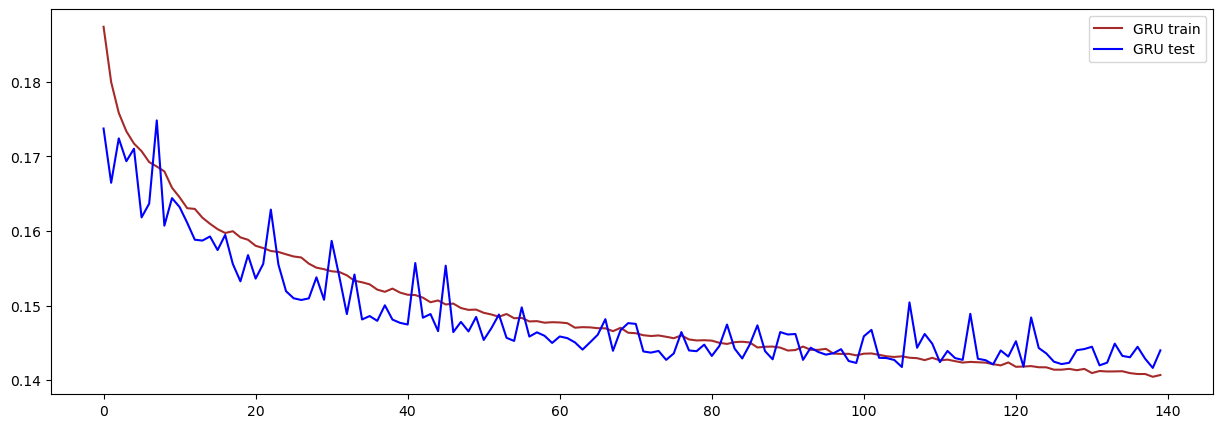

In [71]:
#plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
#plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

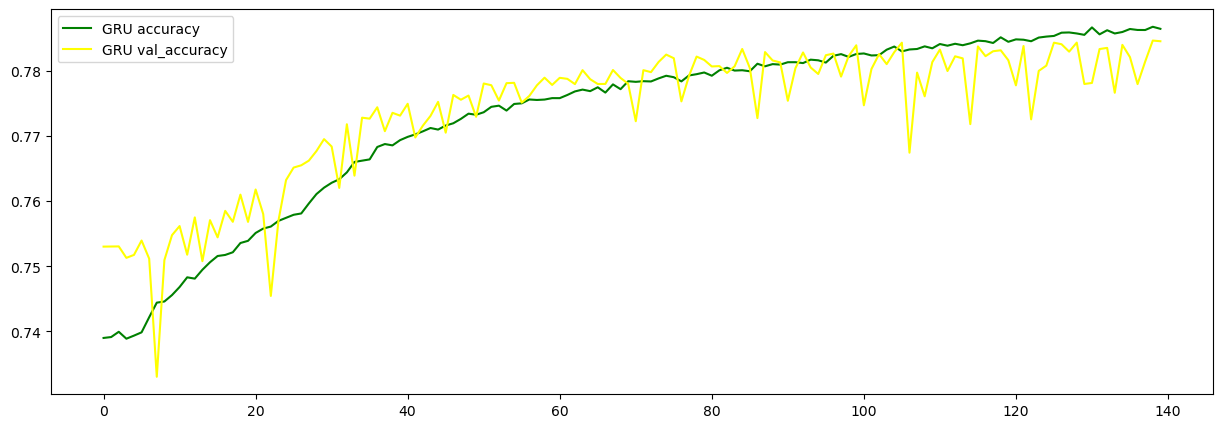

In [72]:
plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.legend()
plt.show()

In [73]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [74]:
np.shape(pred_y)

(95065, 1)

In [75]:
pred_y

array([[0.00112302],
       [0.00072472],
       [0.00035856],
       ...,
       [0.04031506],
       [0.04177569],
       [0.04260728]], dtype=float32)

In [76]:
pred_y=np.reshape(pred_y,95065)

0.1439939432422988
0.22568952734421266
0.37946533865729926
0.2679540566364847


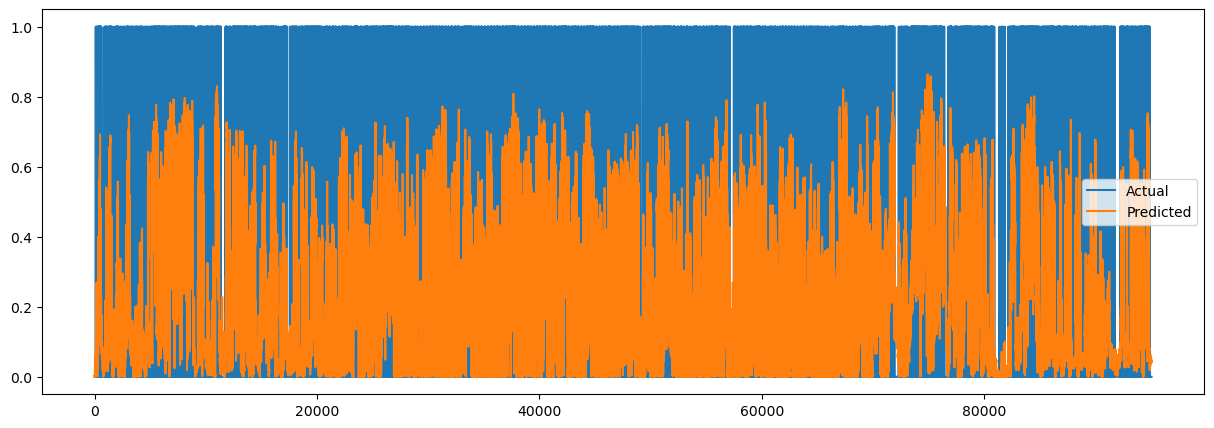

In [77]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [78]:
np.shape(train_X)

(380256, 16, 15)

In [79]:
np.shape(train_y)

(380256, 1)

In [80]:
np.shape(test_X)

(95065, 16, 15)

In [81]:
np.shape(test_y)

(95065, 1)

14854/14854 [==============================] - 76s 5ms/step


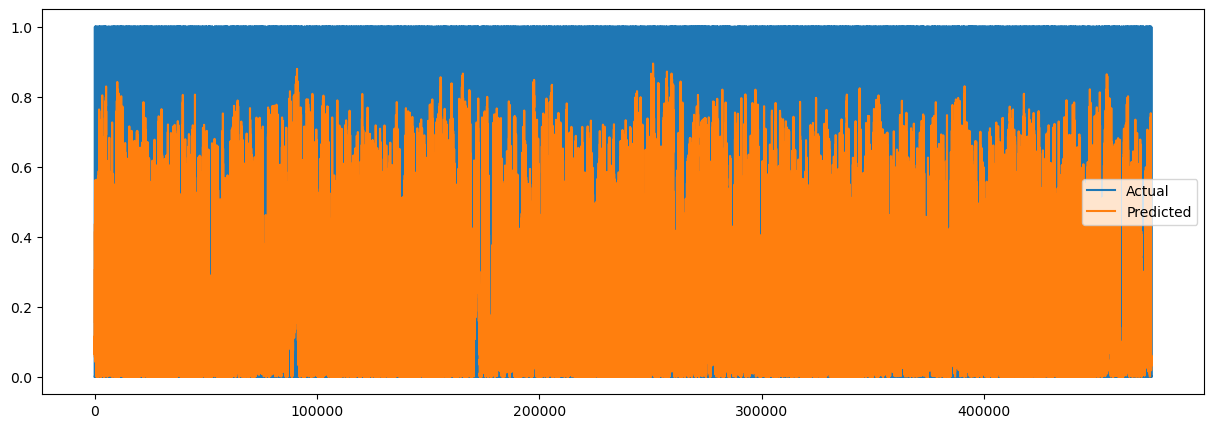

In [82]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

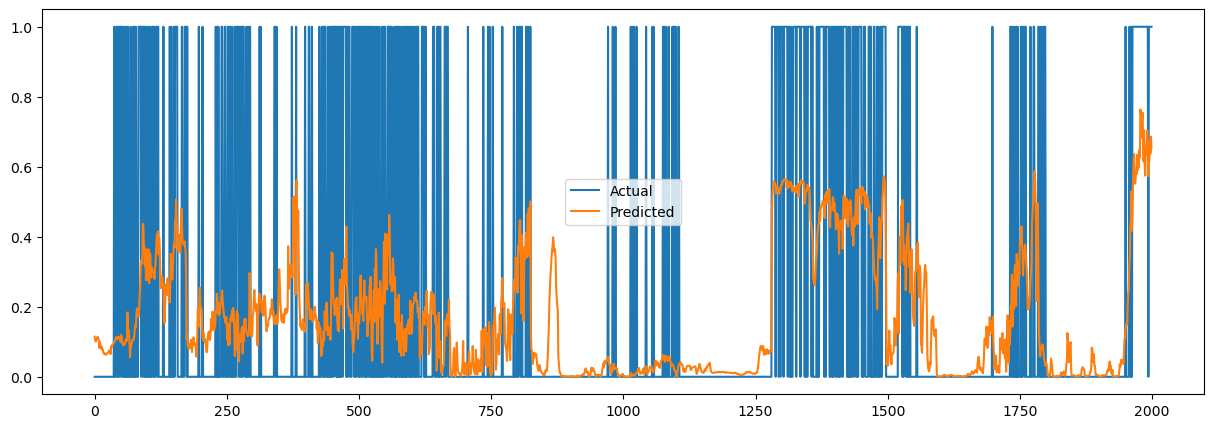

In [83]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [84]:
print(sum(tes)/len(tes))

[0.25794568]


In [85]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.65276326]
[0.80574599]
total acc [0.78449511]


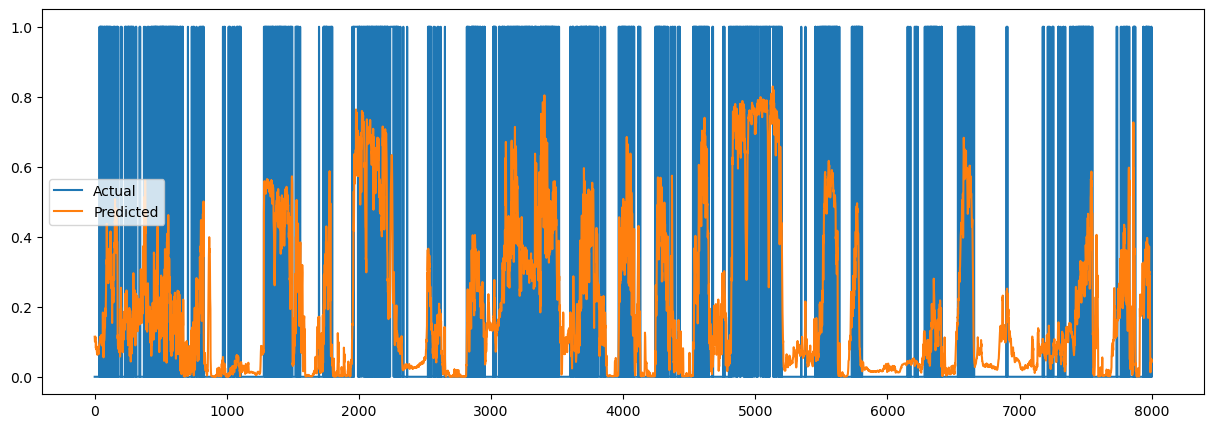

In [86]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

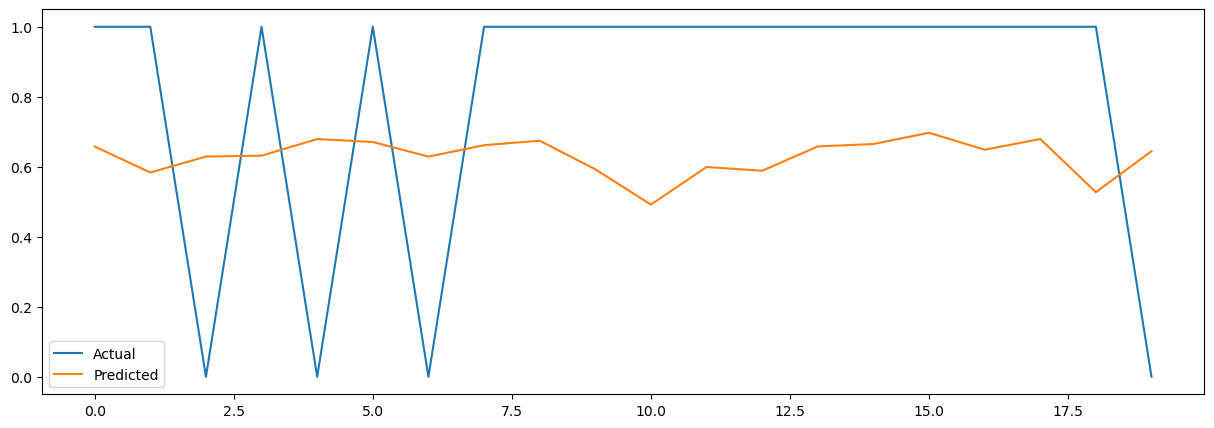

In [87]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

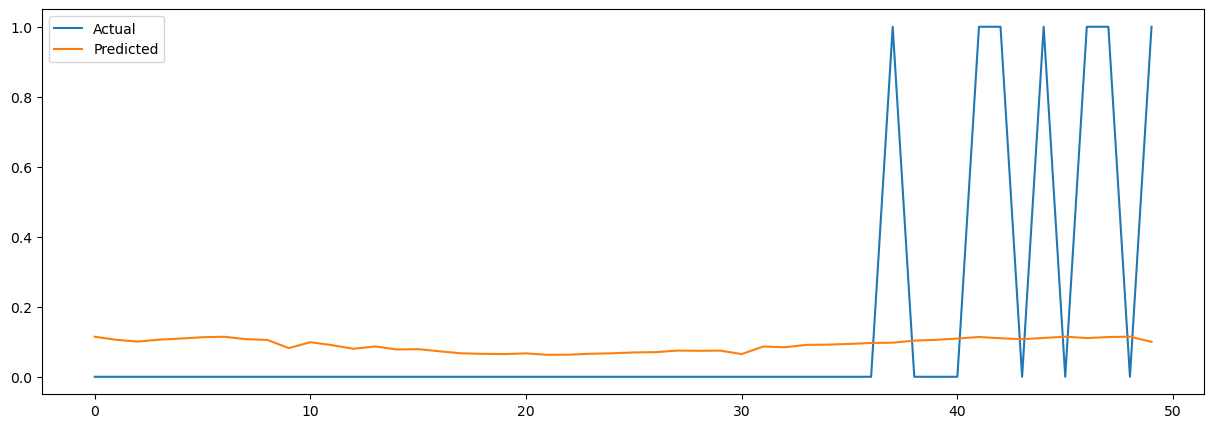

In [88]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

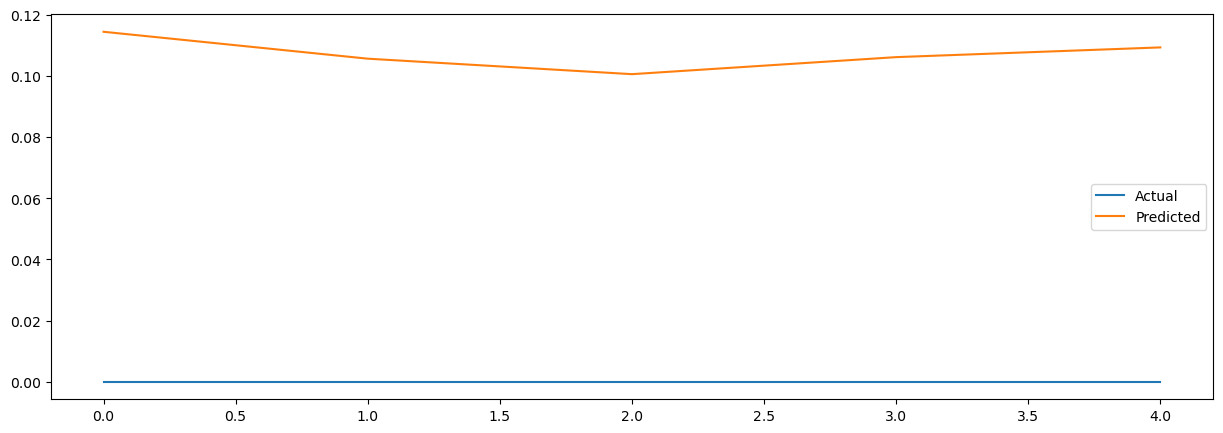

In [89]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

In [90]:
tf.config.experimental.get_memory_info('GPU:0')

{'current': 1006697984, 'peak': 1022096384}